# 一、模型选择
先按照默认参数训练VGG不同大小的模型30个epoch

## 模型性能总结:

| 模型名称 | 参数数量 | 最终准确率 | 总训练时间 | 每轮平均时间 |
|---------|---------|-----------|-----------|------------|
| VGG11   | 9,374,410 | 84.63% | 481.76 秒 | 16.06秒 |
| VGG13   | 9,559,306 | 86.54% | 743.90 秒 | 24.80秒 |
| VGG16   | 14,871,562 | 86.65% | 873.11 秒 | 29.10秒 |
| VGG19   | 20,183,818 | 86.85% | 1001.57秒 | 33.39秒 |

## 模型选择

综合考虑，选择VGG-13模型作为最终方案。这是因为:

- **准确率与参数量的平衡**: VGG-13相比VGG11准确率提升明显(+1.91%)，而参数量只增加约2%
- **训练效率**: 虽然VGG-16和VGG-19准确率略高，但训练时间显著增加，且参数量大幅增长
- **性能收益递减**: 从VGG-13到更深模型，准确率提升有限(VGG-16仅+0.11%，VGG-19仅+0.31%)
- **部署友好**: 相比更深的模型，VGG-13在实际应用中推理速度更快，资源占用更少

VGG-13在准确率和计算开销之间达到了良好的平衡点，是CIFAR-10分类任务的合理选择。

# 二、优化器选择
用VGG-13训练，batchsize=512，epoch=30，lr=0.01
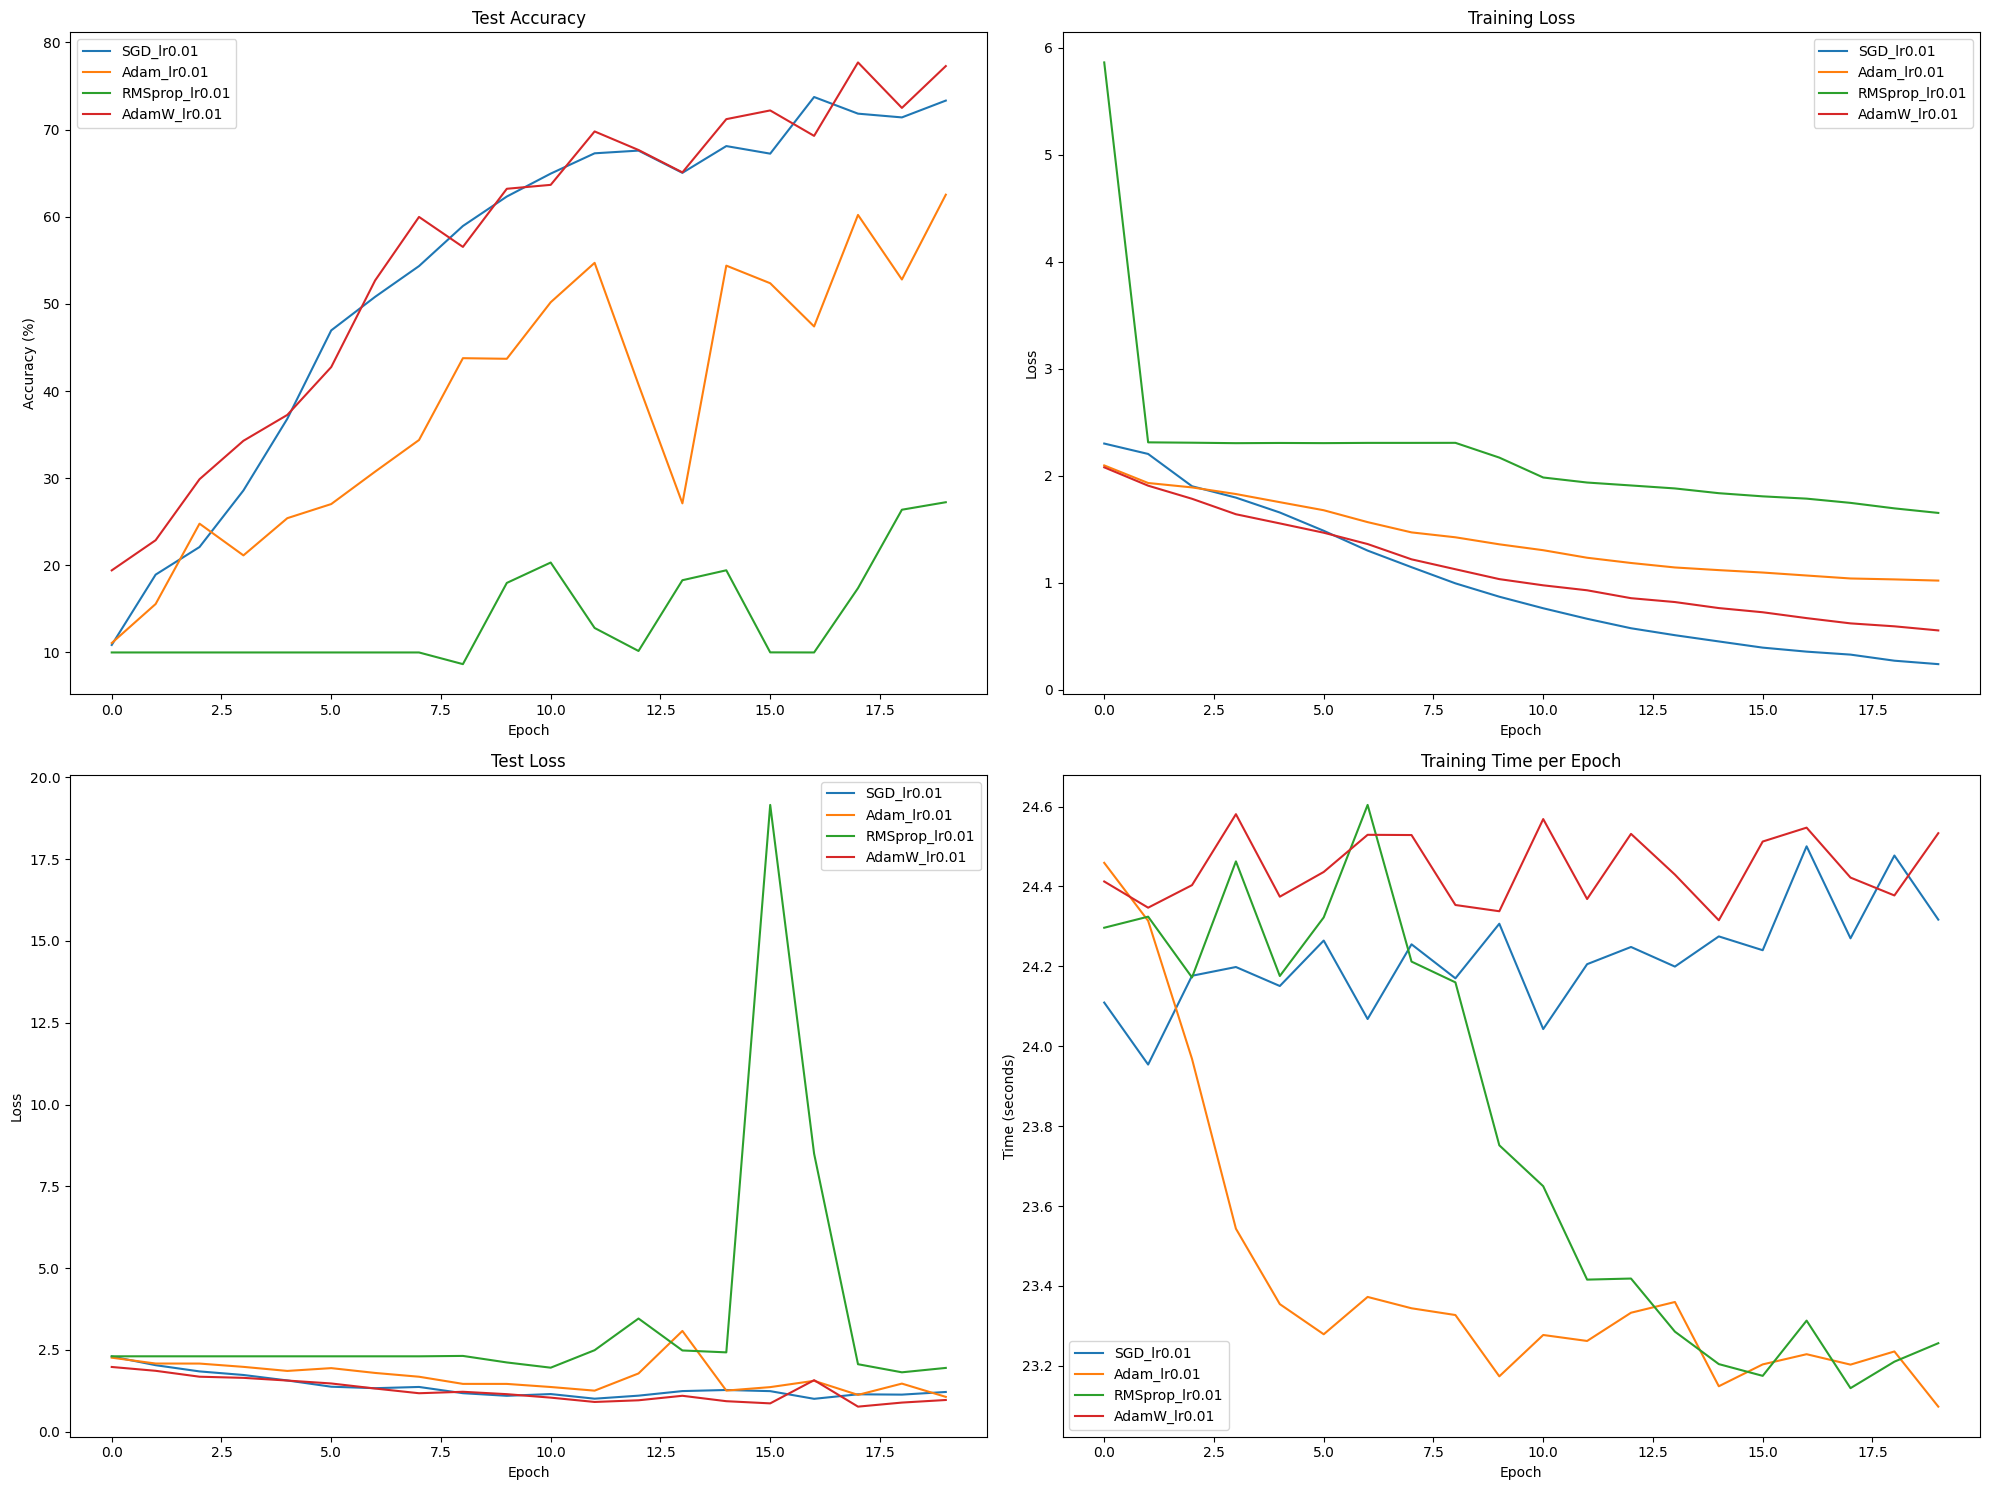

## 优化器性能总结:

| 实验配置         | 最终准确率 | 总训练时间 | 每轮平均时间 |
|------------------|-----------|------------|--------------|
| SGD_lr0.01      | 73.33%    | 484.43秒   | 24.22秒      |
| Adam_lr0.01     | 62.53%    | 468.49秒   | 23.42秒      |
| RMSprop_lr0.01  | 27.24%    | 475.56秒   | 23.78秒      |
| AdamW_lr0.01    | 77.29%    | 488.91秒   | 24.45秒      |

选择SGD，其训练的loss最低，测试集曲线与AdamW差不多

# 三、学习率scheduler选择
batchsize=512，epoch=30，lr=0.01，SGD

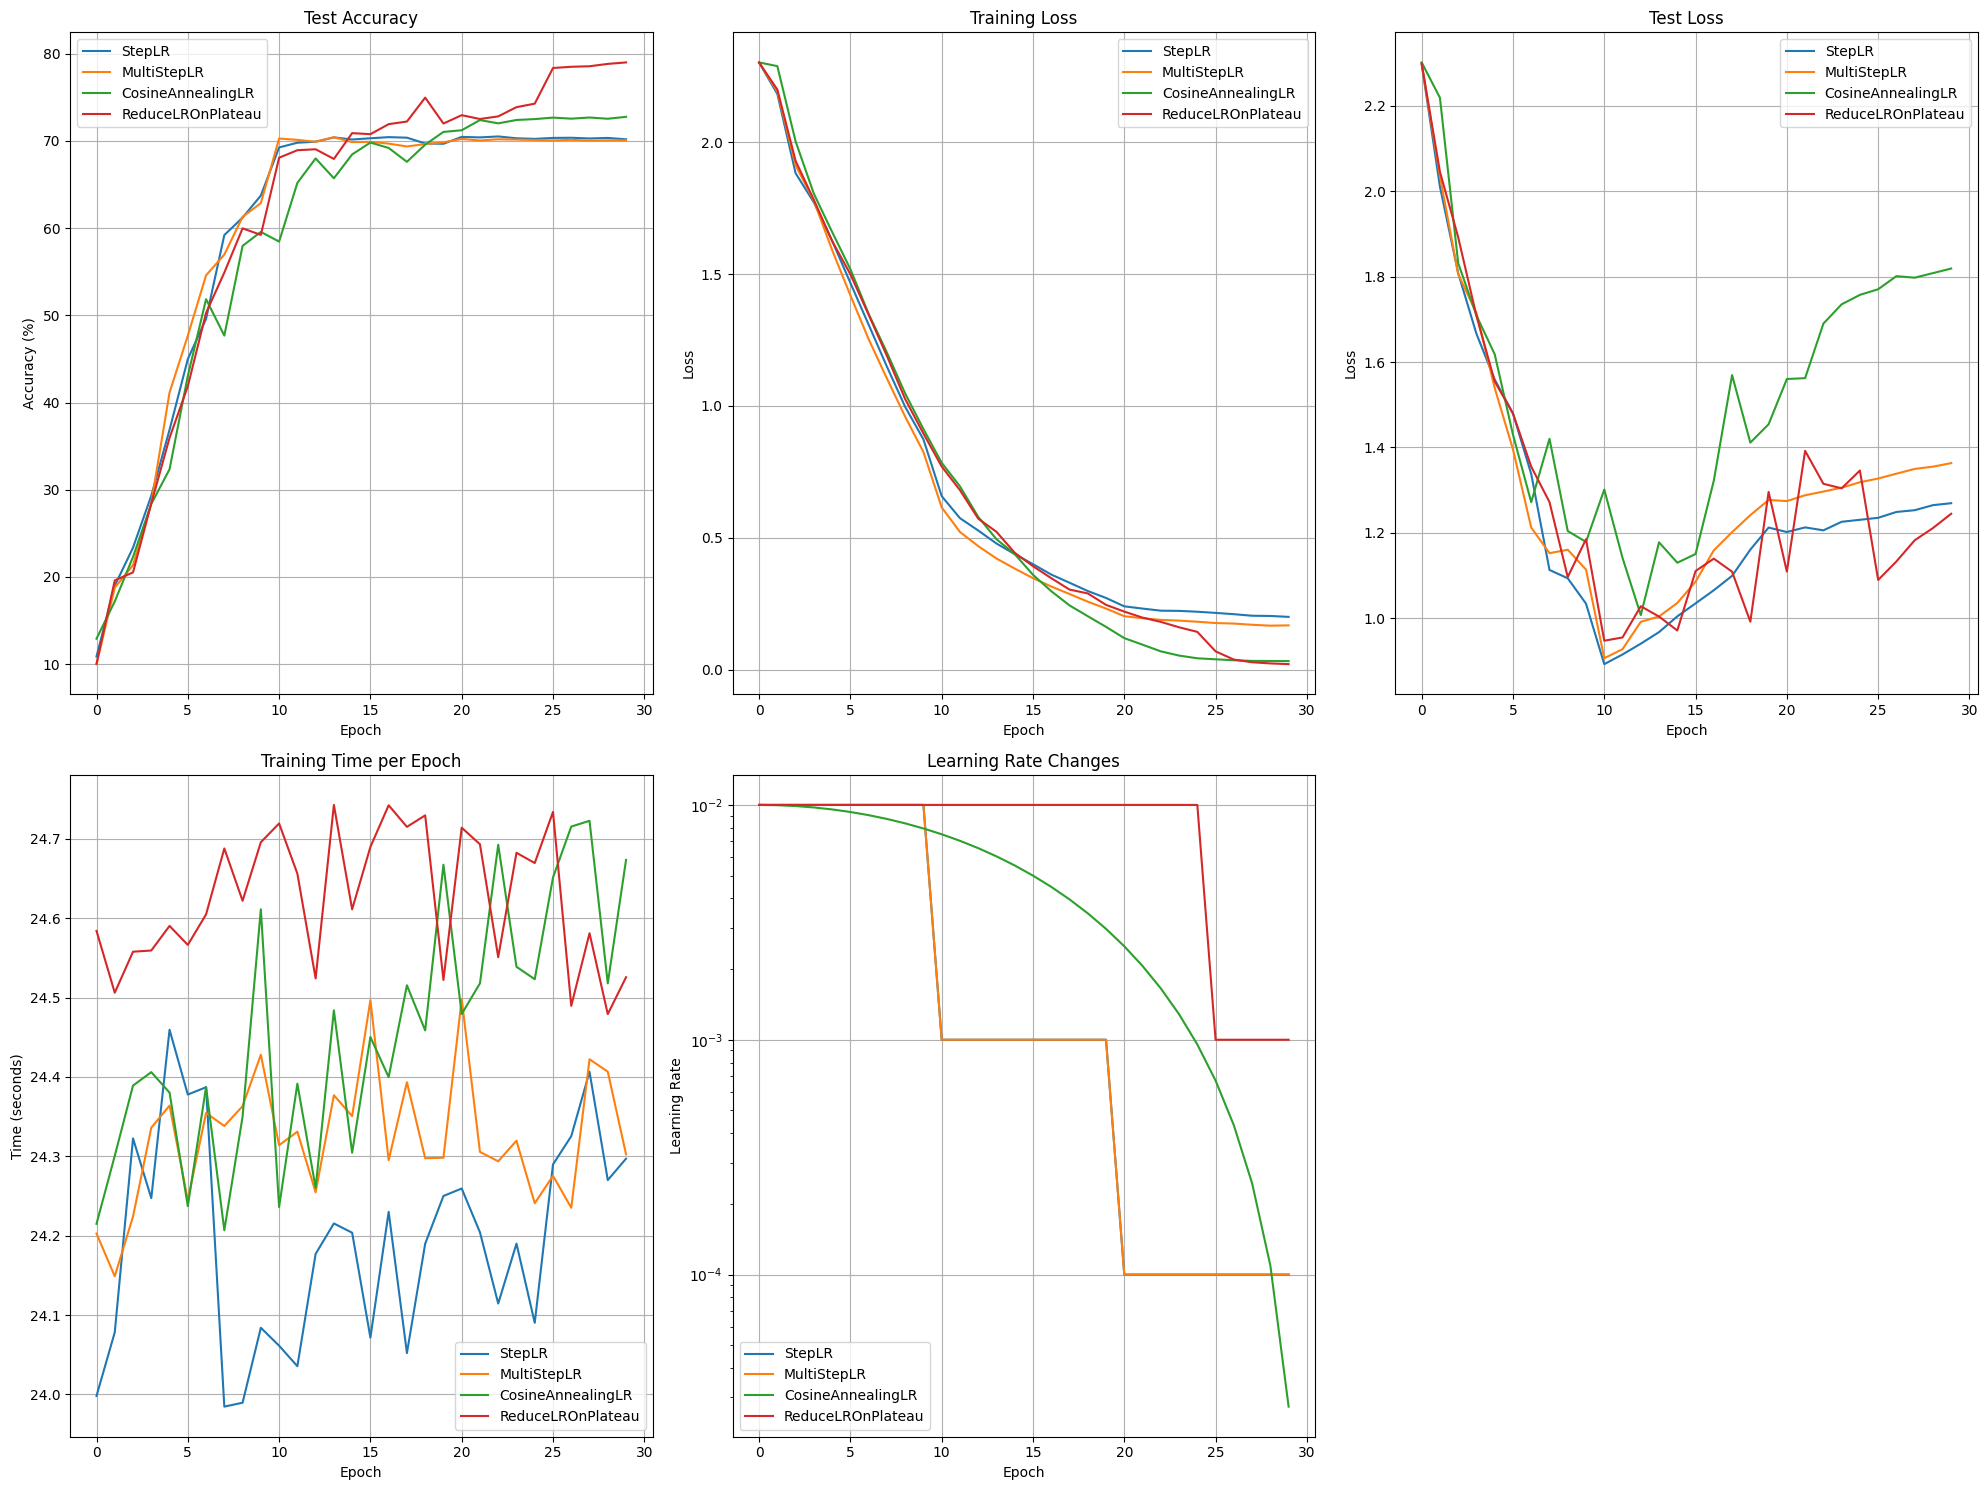

##  学习率scheduler性能总结:
| 学习率调度器          | 最终准确率 | 总训练时间 | 每轮平均时间 |
|-----------------------|-----------|------------|--------------|
| StepLR               | 70.19%    | 725.86秒   | 24.20秒      |
| MultiStepLR          | 70.08%    | 729.71秒   | 24.32秒      |
| CosineAnnealingLR    | 72.77%    | 733.69秒   | 24.46秒      |
| ReduceLROnPlateau    | 79.01%    | 738.75秒   | 24.62秒      |

选择ReduceLROnPlateau，其准确率最高。

# 四、batchsize选择
epoch=30，lr=0.01，SGD，ReduceLROnPlateau

batchsize为512的见第三部分的图，下面画出batchsize=64，128，256

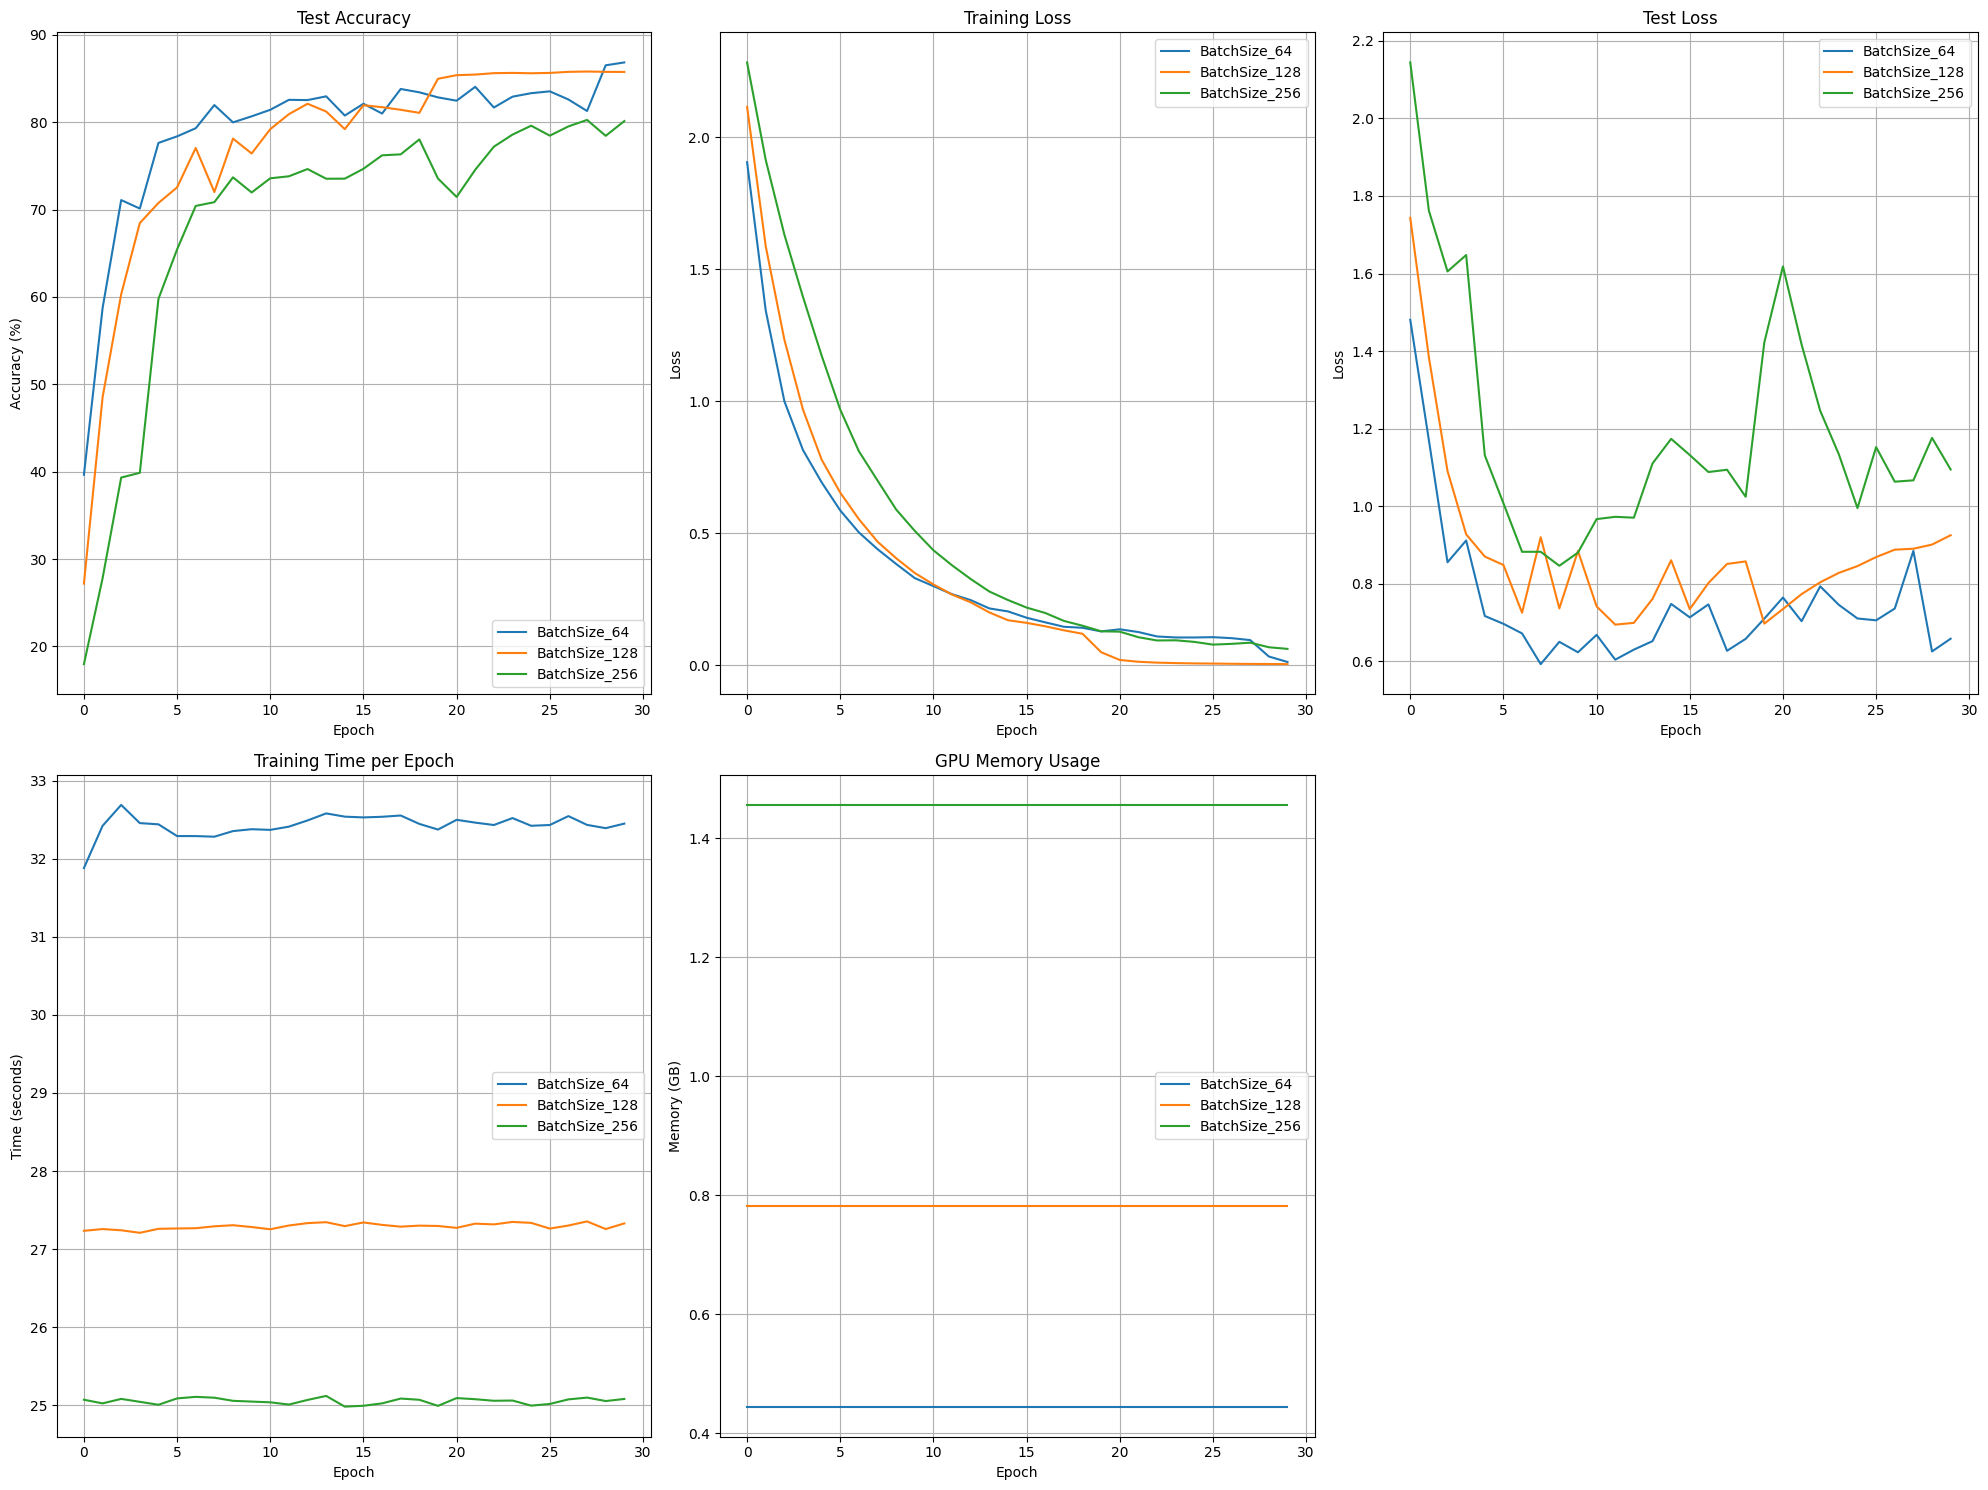

## 批次大小性能总结:
| 批次大小 | 最终准确率 | 总训练时间 | 每轮平均时间 | 每批次平均时间 |
|----------|-----------|------------|--------------|----------------|
| 64       | 86.83%    | 972.86秒   | 32.43秒      | 41.51毫秒      |
| 128      | 85.74%    | 818.80秒   | 27.29秒      | 69.87毫秒      |
| 256      | 80.12%    | 751.65秒   | 25.06秒      | 128.28毫秒     |

选择batchsize=128

# 五、加入图像增强

## 训练设置
- 模型：VGG-13
- 批量大小：128
- 优化器：SGD (lr=0.01, momentum=0.9)
- 学习率调度器：ReduceLROnPlateau (patience=5)
- 训练轮数：100

## 图像增强方案说明
1. **随机裁剪 (RandomCrop)** - 以4像素的填充进行随机裁剪，增加位置鲁棒性
2. **随机水平翻转 (RandomHorizontalFlip)** - 水平镜像增强，增加方向多样性
3. **随机旋转 (RandomRotation)** - 在±15度范围内随机旋转
4. **颜色抖动 (ColorJitter)** - 随机调整亮度、对比度、饱和度和色调
5. **随机仿射变换 (RandomAffine)** - 应用平移和缩放，增加形状变化
6. **随机遮挡 (RandomErasing)** - 随机遮挡图像的一部分，提高对遮挡的鲁棒

## 训练结果总结:

最终测试准确率: 91.64%

最佳测试准确率: 91.70%

最佳准确率出现在第 82 轮

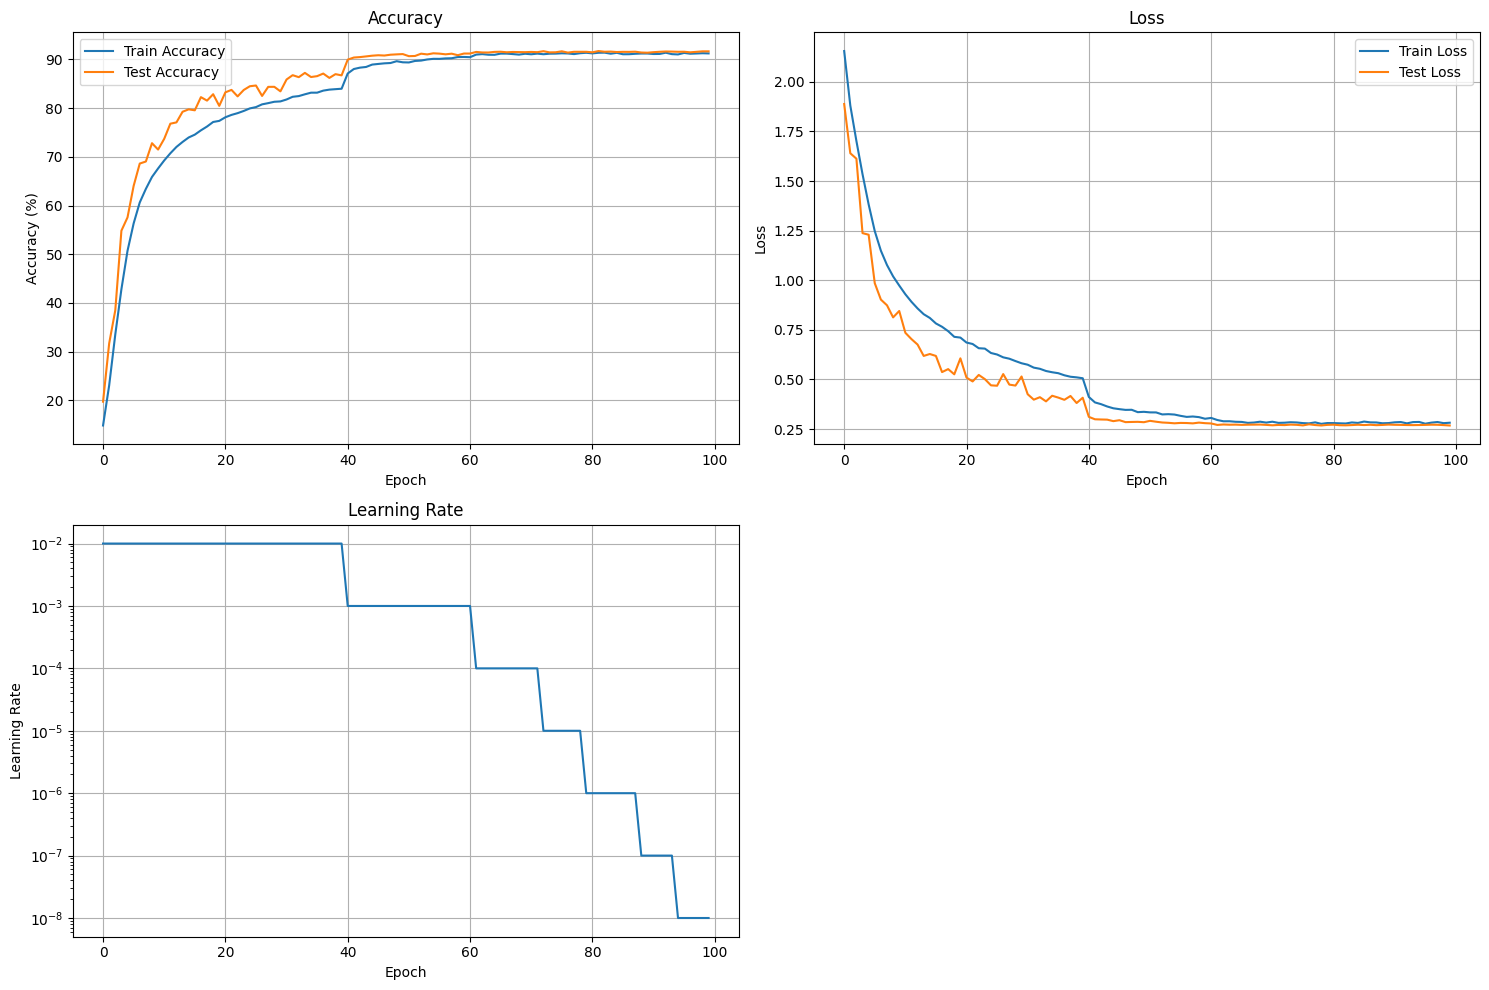

## 改进方向
测试集准确率和训练集准确率均在92%左右，泛化性能良好

猜测模型可能太简单，无法充分拟合数据

鉴于训练成本较大，到此结束